# PROYECTO DEL CURSO

### Usando sclicing con NumPy separar los datos en 2 datasets:
* entrenamiento(80%)
* validación y pruebas(20%) 

In [93]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

all_data = np.load('proyecto_data\proyecto_training_data.npy')
# twenty_percent = int(.20 * len(all_data))
# test_data = all_data[slice(twenty_percent)]
# train_data = all_data[slice(twenty_percent, len(all_data))]
eighty_percent = int(.80 * len(all_data))
train_data = all_data[slice(eighty_percent)]
test_data = all_data[slice(eighty_percent, len(all_data))]

### Análisis exploratorio de datos.
Para cada variable en el dataset calcular:
* Media
* Valor máximo
* Valor mínimo 
* Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* Desviación estándar 


In [94]:
print ("MEDIA:\n", np.nanmean(train_data, axis = 0) ) #train_data.mean(axis = 0) )
max_arr = np.nanmax(train_data, axis = 0)
print ("MÁXIMO:\n", max_arr )
min_arr = np.nanmin(train_data, axis = 0)
print ("MÍNIMO:\n", min_arr )
print ("RANGO:\n", (max_arr - min_arr) )
print ("DESVIACIÓN ESTÁNDAR:\n", np.nanstd(train_data, axis = 0) )

MEDIA:
 [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]
MÁXIMO:
 [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
MÍNIMO:
 [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
RANGO:
 [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]
DESVIACIÓN ESTÁNDAR:
 [7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


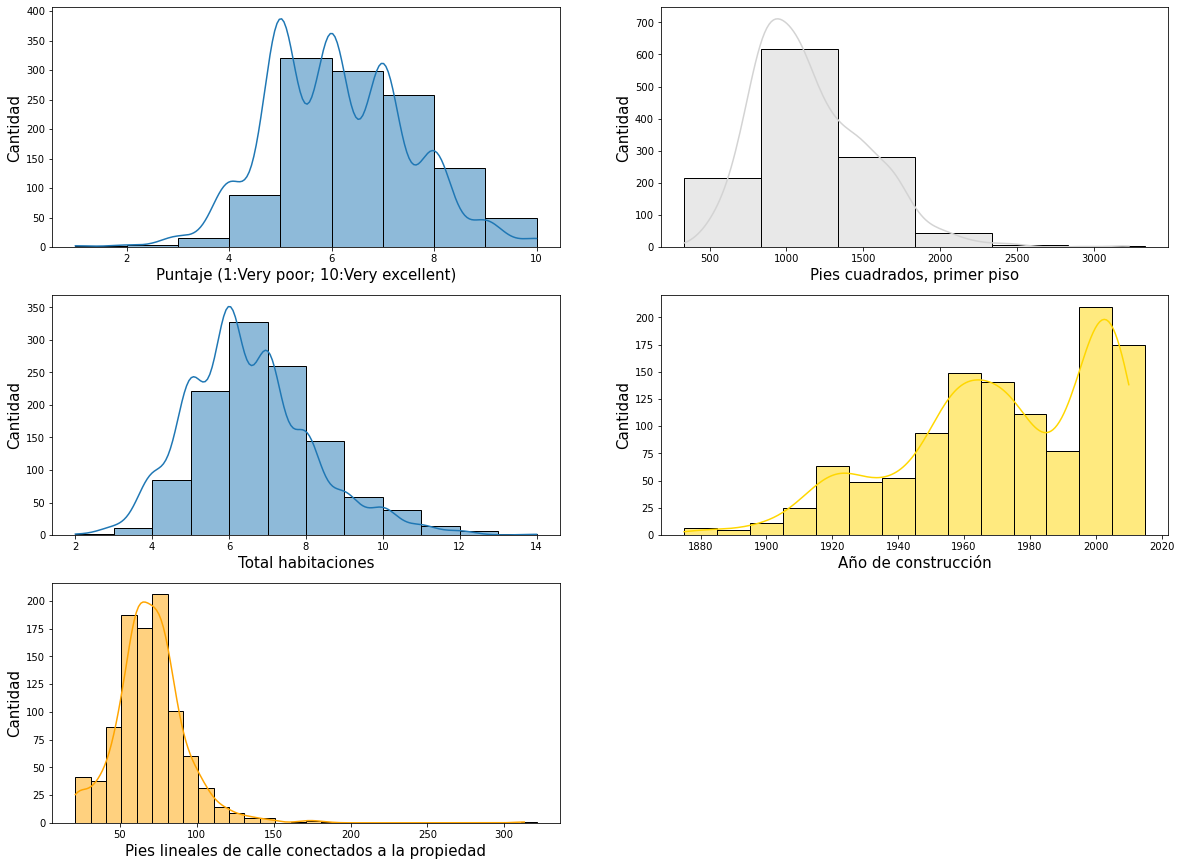

In [95]:
class HistChart():
    def __init__(self, column_name, binwidth, color, xlabel, ylabel = "Cantidad"):
        self.column_name = column_name
        self.binwidth = binwidth
        self.color = color
        self.xlabel = xlabel
        self.ylabel = ylabel

charts = [
    # HistChart("SalePrice", 30000, "yellowgreen", "Precio de venta USD"),
    HistChart("OverallQual", 1, None, "Puntaje (1:Very poor; 10:Very excellent)"),
    HistChart("1stFlrSF", 500, "lightgrey", "Pies cuadrados, primer piso"),
    HistChart("TotRmsAbvGrd", 1, None, "Total habitaciones"),
    HistChart("YearBuilt", 10, "gold", "Año de construcción"),
    HistChart("LotFrontage", 10, "orange", "Pies lineales de calle conectados a la propiedad")
]
dtframe = pd.DataFrame(train_data, columns=["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
fig  = plt.figure(figsize = (20, 15))
for index, chart in enumerate(charts):
    hplot = fig.add_subplot(3, 2, index+1)
    hplot = sns.histplot(data = dtframe, x = chart.column_name, binwidth = chart.binwidth, color = chart.color, kde = True)
    hplot.set_xlabel(chart.xlabel, fontsize = 15);
    hplot.set_ylabel (chart.ylabel, fontsize = 15);

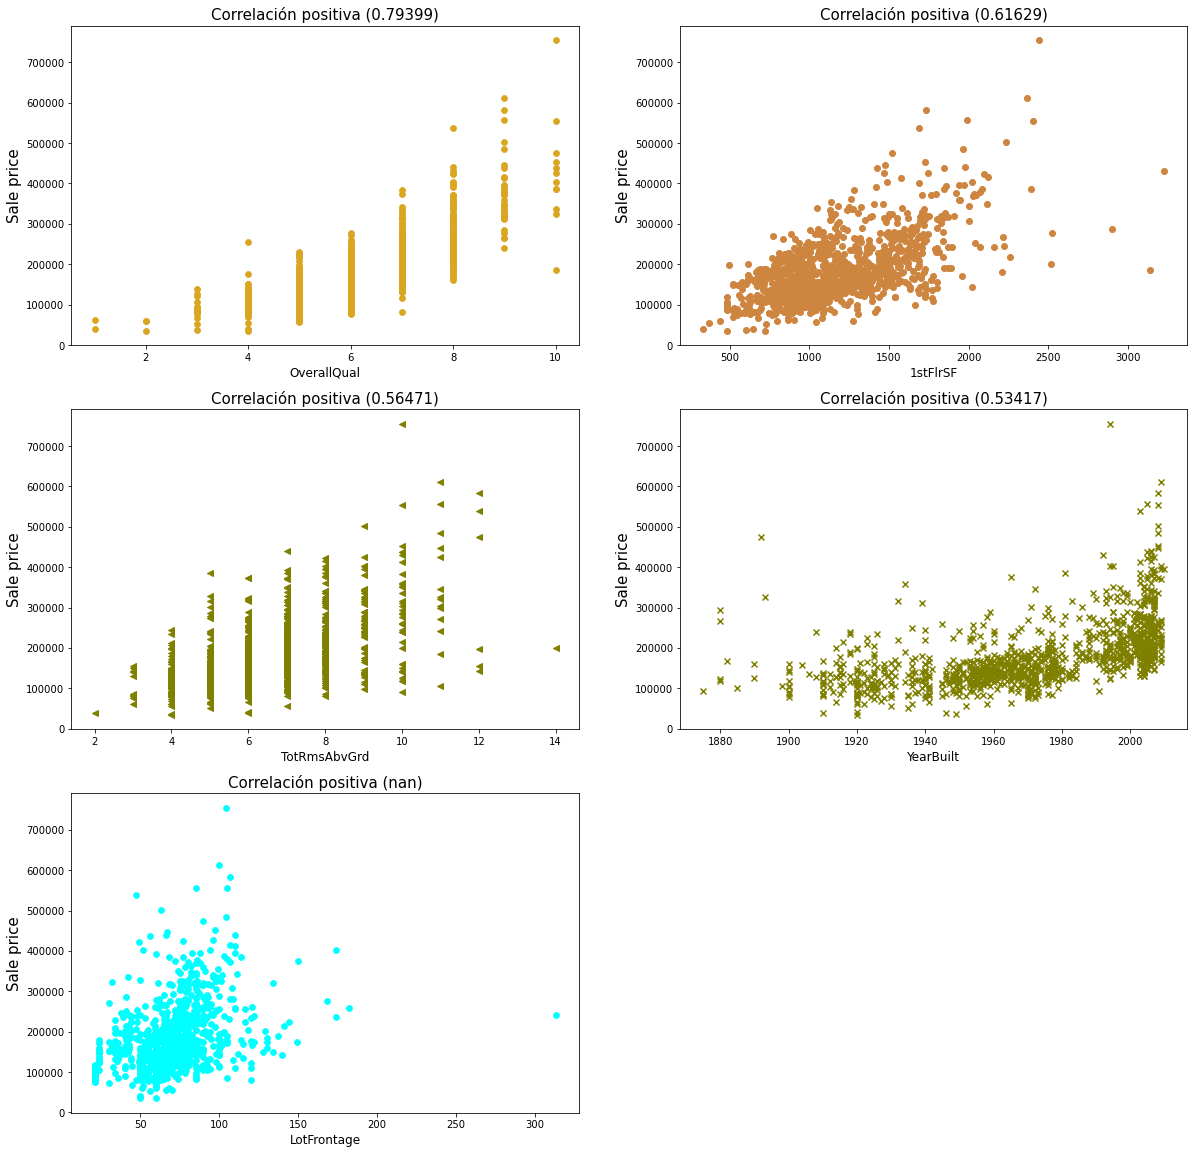

In [111]:
fig  = plt.figure(figsize = (20, 20))
marc = ["*", ">", "<", "o", "v", ".", "+", "8", "x", "^"]
# experimentar con los siguientes markers o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'#
kolor = ["peru", "olive", "aqua", "palegreen", "dodgerblue", "crimson", "lightpink", "goldenrod", "gainsboro", "coral"]
for index in range(dtframe.shape[1]):   # iterar columnas
    if (index > 0):   # solo las variables independientes
        y_vals = dtframe.iloc[: , 0].values
        x_vals = dtframe.iloc[: , index].values
        corrcoef = np.corrcoef(x_vals, y_vals)[0, 1]
        scarer = fig.add_subplot(3, 2, index) 
        scarer.scatter(x_vals, y_vals, marker = marc[np.random.randint(10)], color = kolor[np.random.randint(10)])  
        title = "No existe correlación"
        if (corrcoef != 0):
            title = "Correlación {} ({:.5})".format( ("negativa" if (corrcoef < 0) else "positiva"), corrcoef )
        scarer.set_title(title, fontsize = 15)
        scarer.set_xlabel(dtframe.columns[index], fontsize = 12)
        scarer.set_ylabel("Sale price", fontsize = 15)


## VARIABLES CON MÁS POTENCIAL PREDICTIVO
BasadoS en la gráfica y el coeficiente de correlación de cada par (x, y) es observable que las 2 variables con más potencial predictivo son:
1. OverallQual
2. 1stFlrSF

In [104]:
# *** TESTS *** #
print(dtframe.columns[2])

1stFlrSF
